# K-Means Clustering  

### Apa Itu K-Means Clustering?  

Teknik pengelompokan (clustering) berbasis partisi membagi data menjadi K kelompok berdasarkan jarak setiap kelompok direpresentasikan oleh centroid (rata-rata dari titik dalam kluster).  

### Mengapa Perlu Clustering?  

Data sering kali tidak memiliki label → Unsupervised Learning clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik.  

### Tujuan dan Fungsi  

- Meminimalkan variasi dalam kluster (within-cluster variance)  
- Mengelompokkan objek sehingga:  
    - Objek dalam kluster sehomogen mungkin  
    - objek antar kluster seheterogen mungkin  

### Langkah-Langkah Algoritma K-Means  
1. Tentukan jumlah kluster K,

2. Pilih K centroid awal secara acak,

3. Hitung jarak setiap data ke tiap centroid,

4. Kelompokkan data berdasarkan centroid terdekat,

5. Hitung ulang centroid dari rata-rata anggota kluster,

6. Ulangi langkah 3–5 hingga konvergen (tidak ada perubahan signifikan).  

### Kelebihan  
- Cepat dan efisien  

- Mudah dipahami & diimplementasikan  

- Bekerja baik pada data besar  

- Hasil stabil jika inisialisasi bagus  

### Kekurangan  
- Harus menentukan nilai K di awal  

- Sensitif terhadap outlier  

- Dipengaruhi oleh skala dan dimensi data  

- Hanya cocok untuk bentuk kluster sferis  

### Evaluasi Hasil Klustering  
- Inertia: Jumlah kuadrat jarak antara titik dan centroid  

- Silhouette Score: Ukuran seberapa mirip suatu objek dengan klusternya dibanding kluster lain  

- Elbow Method: Untuk memilih nilai K optimal


# Implementasi K-Means Clustering

### Import libraries, load, & read dataset

import libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Loading & Read the Dataset

In [2]:
data = pd.read_csv('iris_dataset.csv')
print("Dataset loaded successfully")
data

Dataset loaded successfully


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Menghapus Class

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

memisahkan (filter) dataset Iris berdasarkan class bunga

In [5]:
iris_setosa=data.loc[data["class"]=="Iris-setosa"]
iris_virginica=data.loc[data["class"]=="Iris-virginica"]
iris_versicolor=data.loc[data["class"]=="Iris-versicolor"]

### Pre-process data (Standardization data)

standardisasi fitur (feature scaling)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns[:-1])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


menghitung nilai rata-rata (mean) dan standar deviasi (std)

In [7]:
print(np.mean(X['sepal_length']), np.std(X['sepal_length']))
print(np.mean(X['sepal_width']), np.std(X['sepal_width']))
print(np.mean(X['petal_length']), np.std(X['petal_length']))
print(np.mean(X['petal_width']), np.std(X['petal_width']))

-4.736951571734001e-16 1.0
-6.631732200427602e-16 0.9999999999999999
3.315866100213801e-16 0.9999999999999998
-2.842170943040401e-16 1.0


### Data Visualization   

plot setiap class bunga ke histogram

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

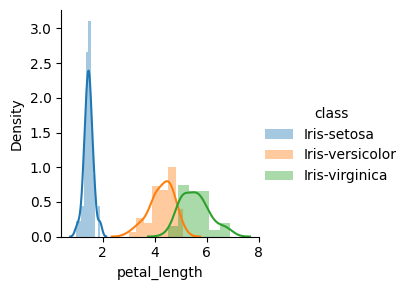

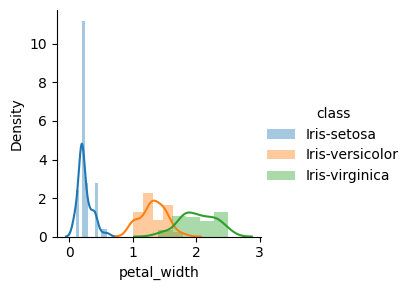

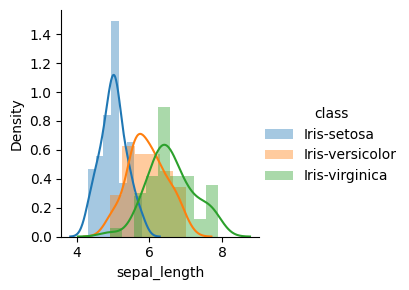

In [8]:
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "sepal_length").add_legend()

heatmap korelasi 

<Axes: >

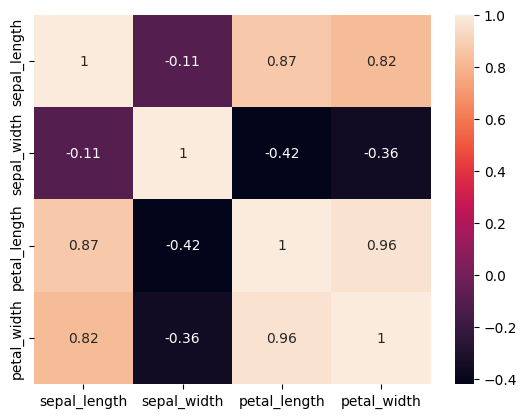

In [9]:
sns.heatmap(X.corr(),annot=True )

box plot

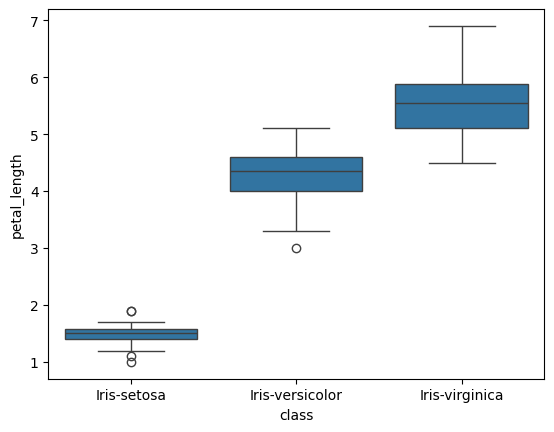

In [10]:
sns.boxplot(x="class",y="petal_length",data=data)
plt.show()

violin plot

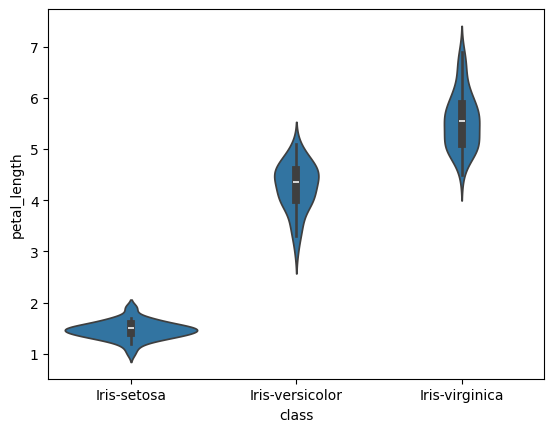

In [11]:
sns.violinplot(x="class",y="petal_length",data=data)
plt.show()

Scatter plot

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


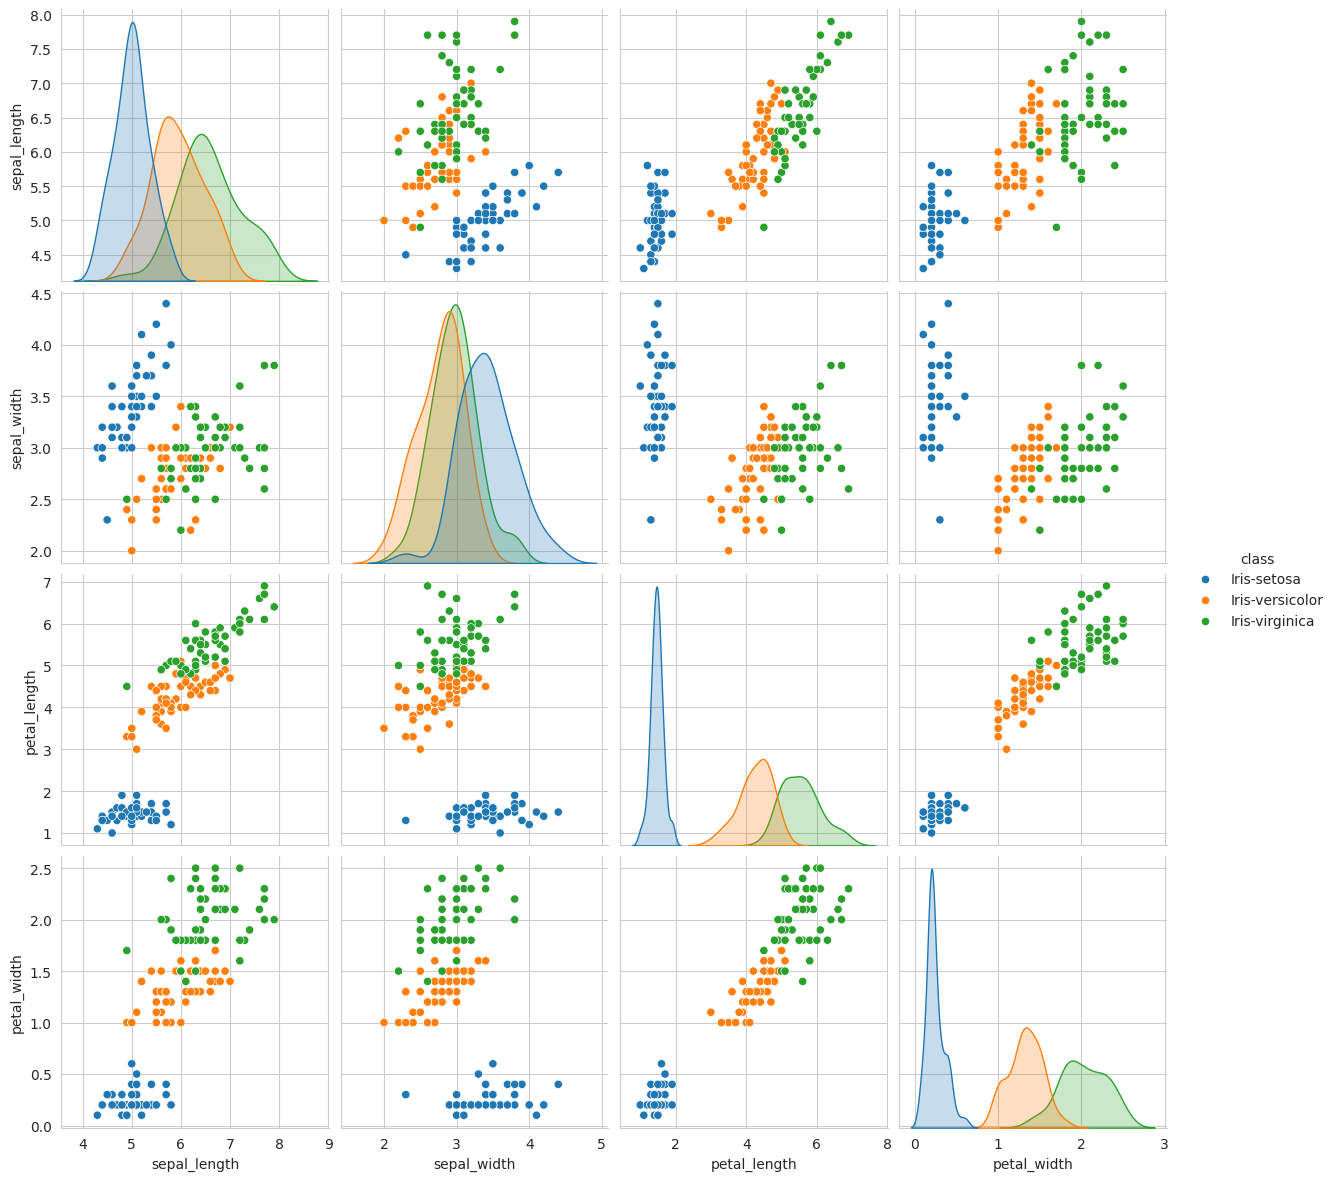

In [12]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="class",size=3);
plt.show()

# Modeling K-Means Clustering

### Clustering

Training data

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


visualisasi data clustering

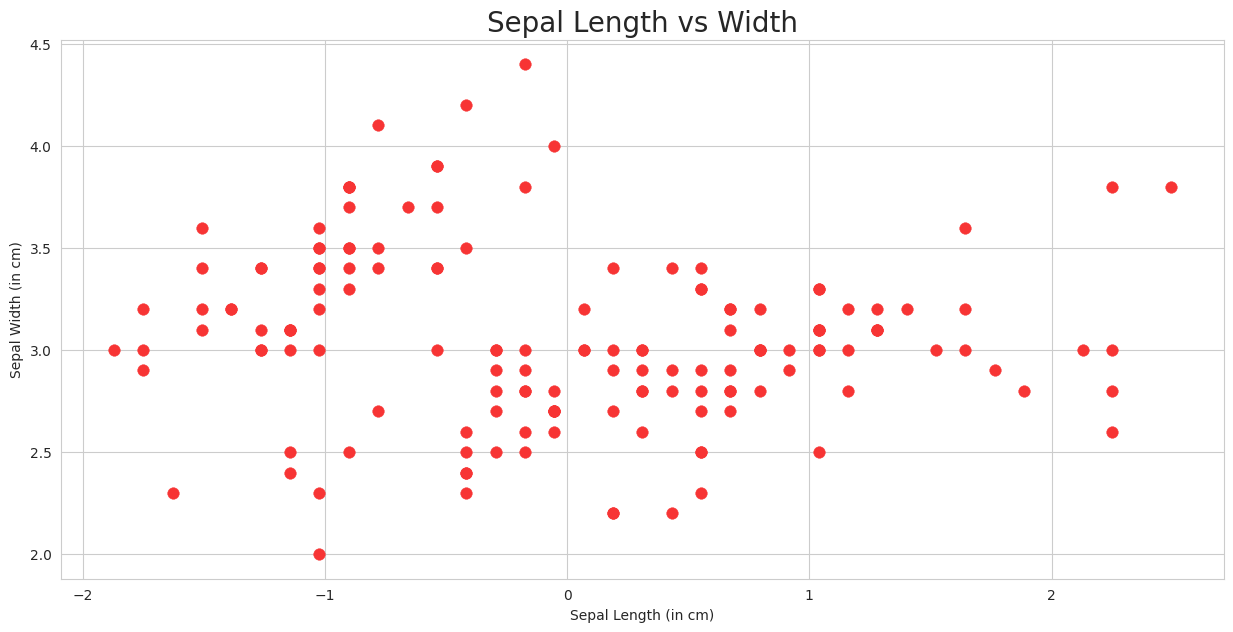

In [14]:
ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=X['sepal_length'],y=data['sepal_width'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

Elbow Method untuk cluster 1-10

NameError: name 'sse' is not defined

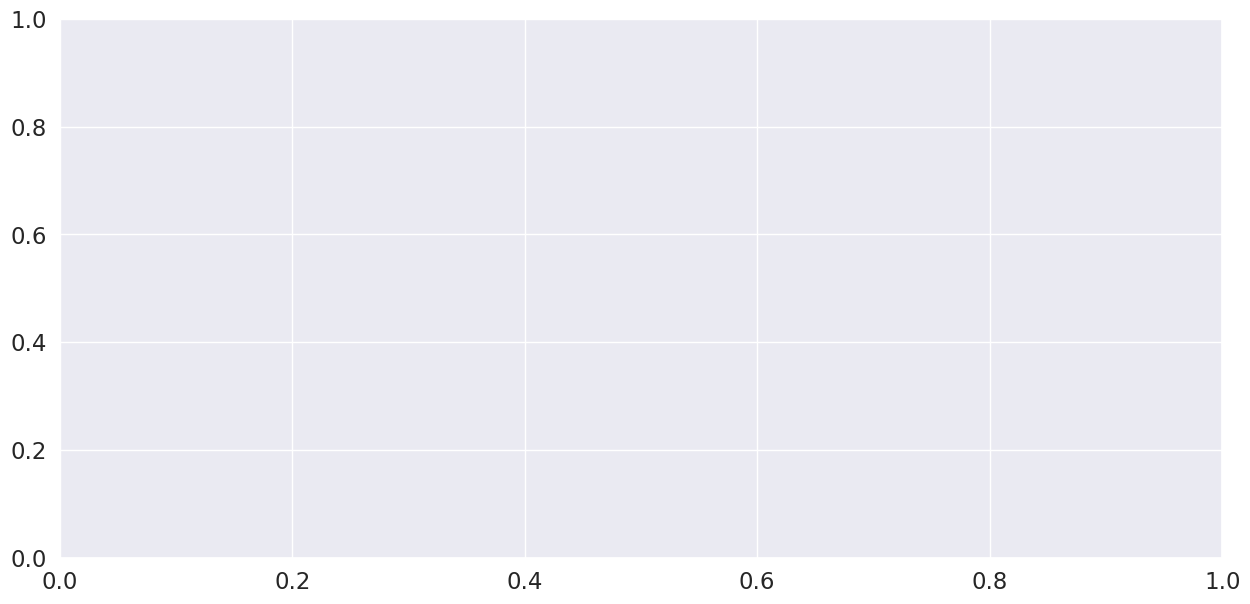

In [15]:
ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),sse, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

nilai sse untuk cluster 1-10

In [344]:
sse=[]

for i in range(1,11):
    km = KMeans(i)
    km.fit(X)
    sse.append(km.inertia_)

sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.56163015873017,
 42.27779898989901,
 40.42104059044671,
 30.02881887717758,
 28.26834557109558,
 27.766606978781862]

nilai silhouette untuk cluster 1-10

In [350]:
silhouette_scores = []

for i in range(2, 11):
    km = KMeans(i)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(float(score))

silhouette_scores

[0.6808136202936816,
 0.5509643746707443,
 0.4972279726640147,
 0.3722867137706821,
 0.33523784854529093,
 0.4577092441242155,
 0.45879908223177296,
 0.3340809047671643,
 0.32102390921080004]

### Uji coba Clustering menggunakan 2 Centroid

Menentukan centroid cluster

In [301]:
kms = KMeans(n_clusters=2, init='k-means++')
kms.fit(X)


KMeans(n_clusters=2)

In [281]:
clusters = X.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(X)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


menyimpan koordinat centroid (pusat) setiap klaster

In [282]:
kms.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

 visualisasi hasil clustering menggunakan 2 centroid

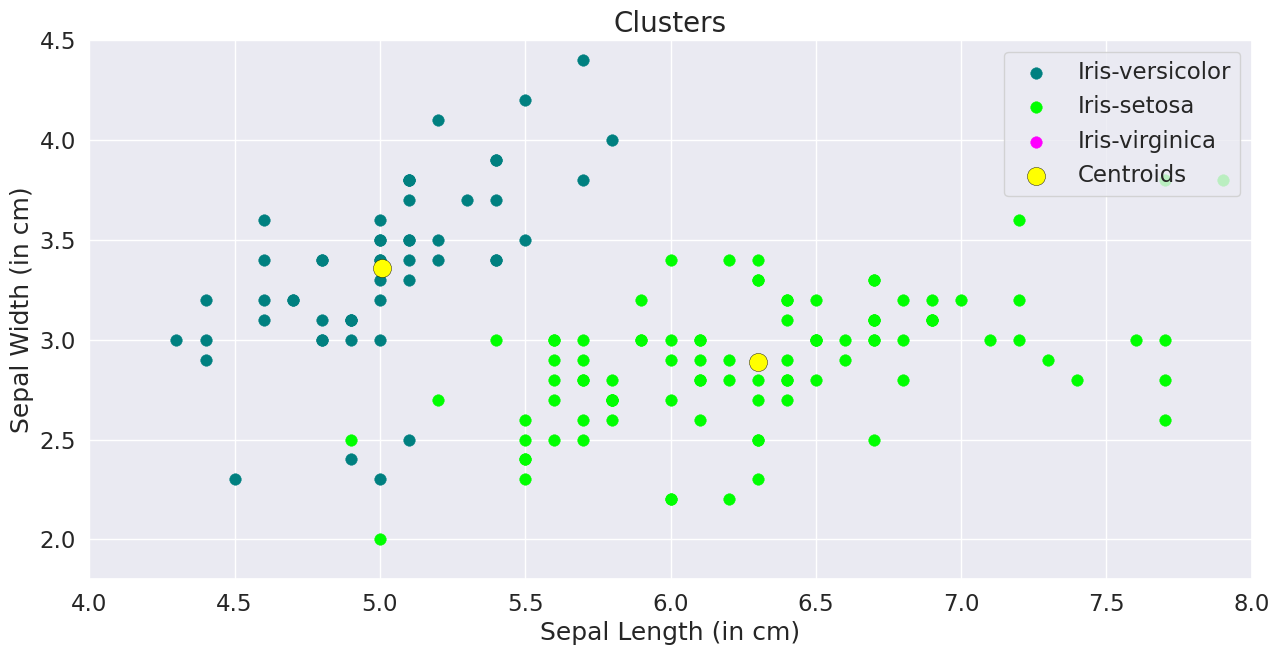

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

nilai sse dengan 2 centroid

In [ ]:
sse = kms.inertia_
sse

152.36870647733915

nilai Silhouette Score dengan 2 centroid

In [ ]:
cluster_labels = kms.predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6808136202936816


### Uji coba Clustering menggunakan 3 Centroid

Menentukan centroid cluster

In [302]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(X)

KMeans(n_clusters=3)

In [303]:
clusters = X.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(X)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


menyimpan koordinat centroid (pusat) setiap klaster

In [304]:
kms.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

 visualisasi hasil clustering menggunakan 3 centroid

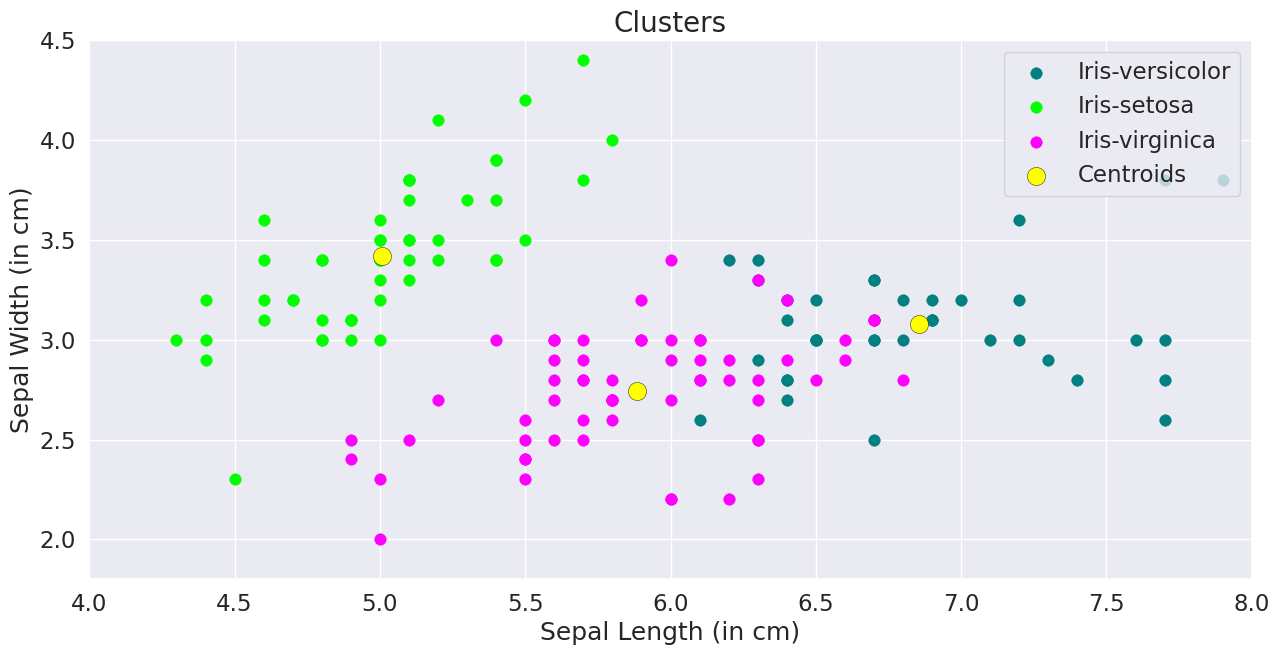

In [305]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

nilai sse dengan 3 centroid

In [306]:
sse = kms.inertia_
sse

78.94506582597728

nilai Silhouette Score dengan 3 centroid

In [307]:
cluster_labels = kms.predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5509643746707443


### Uji coba Clustering menggunakan 4 Centroid

Menentukan centroid cluster

In [318]:
kms = KMeans(n_clusters=4, init='k-means++')
kms.fit(X)

KMeans(n_clusters=4)

In [320]:
clusters = X.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(X)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


menyimpan koordinat centroid (pusat) setiap klaster

In [328]:
kms.cluster_centers_

array([[6.26444444, 2.88444444, 4.88666667, 1.66666667],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.01481481, 3.0962963 , 5.91851852, 2.15555556],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

 visualisasi hasil clustering menggunakan 4 centroid

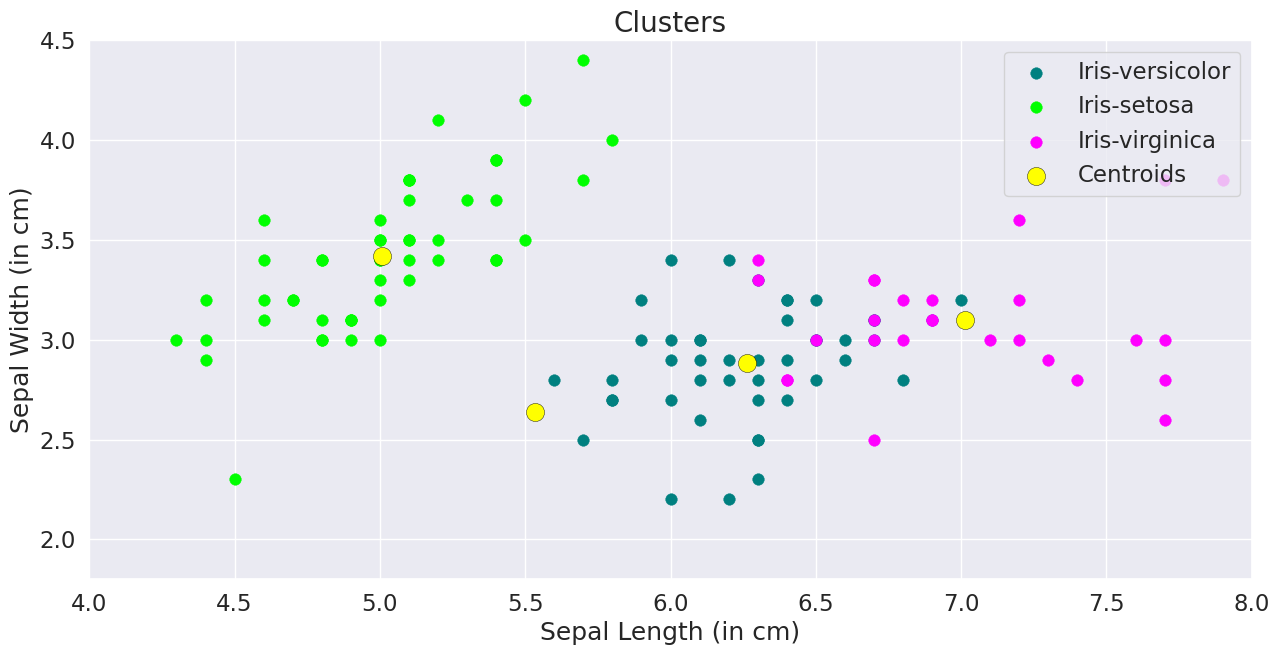

In [329]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

nilai sse dengan 4 centroid

In [330]:
sse = kms.inertia_
sse

57.35501904761905

nilai Silhouette Score dengan 4 centroid

In [331]:
cluster_labels = kms.predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4962850920616641
